# Plot of results: CPU vs GPU baseline level 0

In [1]:
import re, sys, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pygrep(match, filelist, processline=lambda x: x):
    output=[]
    for f in filter(os.path.isfile, filelist):
        for line in open(f).readlines():
            if re.match(match, line):
                output.append(processline(line))
    return output

def line2data(line):
    newline = line.replace('WallClockTime: ', '').replace('Pre:','').replace('Solve: ','').replace('Post: ','').replace('Total: ','')
    return [float(x) for x in newline.split()]

def averageoutfile(file, match='WallClockTime'):
    return np.mean(np.array(pygrep(match, [file], processline=line2data)),axis=0)

In [3]:
GPUcaselist=[ 
    {'NRANKS':4*8,   'NNODES':4,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0004/Nodes_0004-1515363.out'},
    {'NRANKS':8*8,   'NNODES':8,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0008/Nodes_0008-1515369.out'},
    {'NRANKS':16*8,  'NNODES':16,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0016/Nodes_0016-1515370.out'},
    {'NRANKS':32*8,  'NNODES':32,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0032/Nodes_0032-1515371.out'},
    {'NRANKS':64*8,  'NNODES':64,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0064/Nodes_0064-1515372.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0128/Nodes_0128-1515373.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/GPU_Baseline_level0/Nodes_0256/Nodes_0256-1515374.out'},
]

In [4]:
print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in GPUcaselist:
    #print(case['NRANKS'])
    case['avgstats']=averageoutfile(case['file'])
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
        32     0.0004     0.7377     0.2057     0.9437
        64     0.0002     0.4462     0.1849     0.6313
       128     0.0002     0.3155     0.1823     0.4980
       256     0.0002     0.2372     0.1886     0.4259
       512     0.0002     0.1983     0.2001     0.3986
      1024     0.0002     0.1824     0.2112     0.3938
      2048     0.0002     0.1733     0.2276     0.4011


In [5]:
CPUcaselist=[ 
    {'NRANKS':4*8, 'NNODES':4,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0004/Nodes_0004-1515118.out'},
    {'NRANKS':8*8, 'NNODES':8,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0008/Nodes_0008-1515119.out'},
    {'NRANKS':16*8,'NNODES':16,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0016/Nodes_0016-1515120.out'},
    {'NRANKS':32*8, 'NNODES':32,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0032/Nodes_0032-1515121.out'},
    {'NRANKS':64*8, 'NNODES':64,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0064/Nodes_0064-1508687.out'},
    {'NRANKS':128*8, 'NNODES':128, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0128/Nodes_0128-1508688.out'},
    {'NRANKS':256*8, 'NNODES':256, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0256/Nodes_0256-1508689.out'},
    {'NRANKS':512*8, 'NNODES':512, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0512/Nodes_0512-1508690.out'},
]

In [6]:
print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in CPUcaselist:
    #print(case['NRANKS'])
    case['avgstats']=averageoutfile(case['file'])
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
        32     0.1111    17.1593     1.5011    18.7708
        64     0.0539     8.5555     0.7626     9.3721
       128     0.0267     4.3321     0.4512     4.8099
       256     0.0133     2.2111     0.2856     2.5099
       512     0.0067     1.0805     0.1998     1.2870
      1024     0.0035     0.5990     0.1785     0.7809
      2048     0.0020     0.3212     0.1629     0.4861
      4096     0.0010     0.1802     0.1612     0.3424


## Make a plot of solver time vs ranks

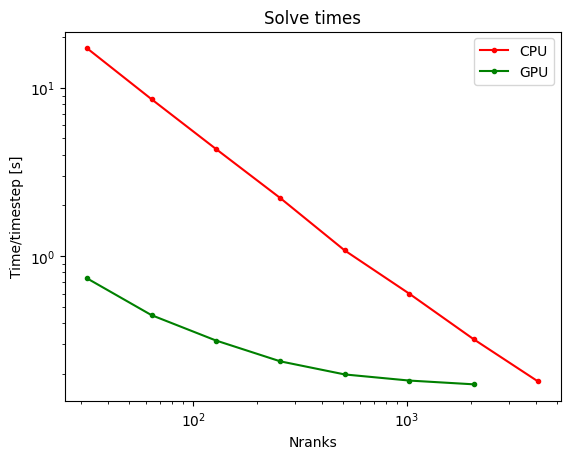

In [7]:
CPUranks       = [x['NRANKS'] for x in CPUcaselist]
CPUsolvetimes  = [x['avgstats'][2] for x in CPUcaselist]
plt.loglog(np.array(CPUranks)/1, CPUsolvetimes, '.-', color='r', label='CPU')

GPUranks       = [x['NRANKS'] for x in GPUcaselist]
GPUsolvetimes  = [x['avgstats'][2] for x in GPUcaselist]
plt.loglog(np.array(GPUranks)/1, GPUsolvetimes, '.-', color='g', label='GPU')

plt.ylabel('Time/timestep [s]')
plt.xlabel('Nranks')
plt.title('Solve times')
plt.legend()

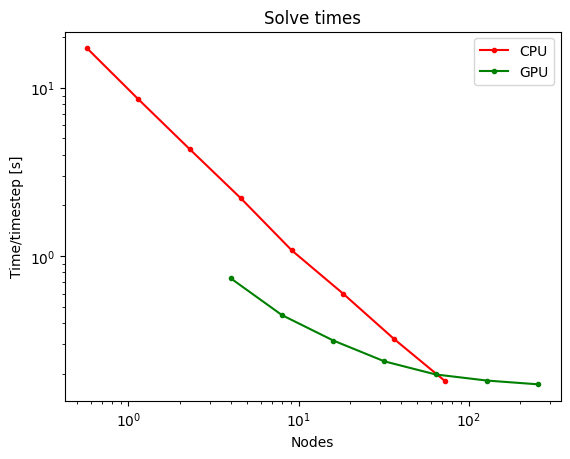

In [8]:
CPUranks       = [x['NRANKS'] for x in CPUcaselist]
CPUsolvetimes  = [x['avgstats'][2] for x in CPUcaselist]
plt.loglog(np.array(CPUranks)/56, CPUsolvetimes, '.-', color='r', label='CPU')

GPUranks       = [x['NRANKS'] for x in GPUcaselist]
GPUsolvetimes  = [x['avgstats'][2] for x in GPUcaselist]
plt.loglog(np.array(GPUranks)/8, GPUsolvetimes, '.-', color='g', label='GPU')

plt.ylabel('Time/timestep [s]')
plt.xlabel('Nodes')
plt.title('Solve times')
plt.legend()